In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
data=np.array(pd.read_csv("/Users/antique/Desktop/ml/data1.csv")) #convert dataframe to directly np array

In [3]:
#data = np.loadtxt('/Users/antique/Desktop/ml/ex1data1.txt', delimiter=',') #alternative way to load from text file
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

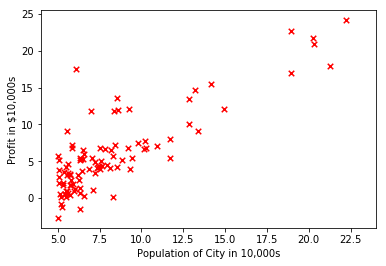

In [4]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.show()

In [5]:
theta=np.zeros((2,1))
iter=400

In [16]:
#last mistake was this, y was transposed
#np.sum(np.power((np.dot(X,theta)-y.T),2))/(2*m)
#np.shape(np.dot(X, theta)-y.T) 
# wow ! what a lame code this was!

In [6]:
def computeCost(X,y,theta):
    h= np.dot(X,theta)
    squarredError= np.power((h-y),2)
    #print(squarredError)
    m=len(y)
    #h = X.dot(theta)
    #J = 1/(2*m)*np.sum(np.square(h-y))
    
    J= (1/(2*m))*(np.sum(squarredError))
    #one line of code: np.sum(np.square(np.dot(X,theta)-y))/(2*m)
    
    return J


In [7]:
computeCost(X,y,theta)

32.072733877455676

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
        
    return(theta, J_history)

In [9]:
[theta, j_his]=gradientDescent(X,y,theta,0.01,iter)
theta

array([[-1.96395718],
       [ 0.998961  ]])

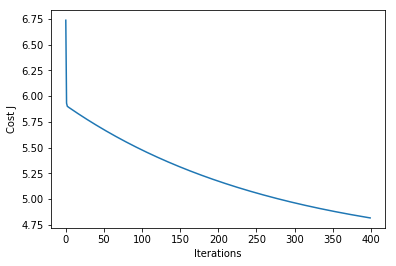

In [10]:
#print('theta: ',theta.ravel())
plt.plot(j_his) #jhis=J history: 1500 values
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show()

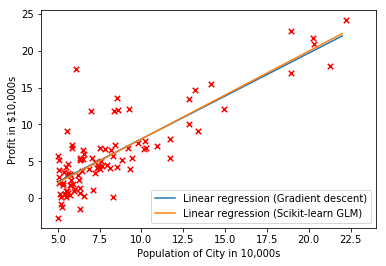

In [12]:
#prediction y= th0+th1*x = [1 x]* [th0 th1].T -- m x 2 . 2 x 1
x_=np.c_[np.ones(23-5), np.arange(5,23)]

y_=np.dot(x_, theta)

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
#careful: while plotting we dont take all ones column for theta0 since that is only used for calculation
plt.plot(x_[:,1],y_, label='Linear regression (Gradient descent)')

#scikit learn 
regr=LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(x_[:,1], regr.intercept_+regr.coef_*x_[:,1], label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [13]:
# Predict profit for a city with population of 35000 and 70000
"""
qq=np.array([[1,3.5],[1,7]])
qq.dot(theta)*10000
"""


'\nqq=np.array([[1,3.5],[1,7]])\nqq.dot(theta)*10000\n'

In [14]:
((np.array([[1, 3.5],[1,7]]).dot(theta)*10000).ravel())[:]

array([ 4519.7678677 , 45342.45012945])

In [15]:
#visulaize JTheta
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)

In [16]:
xx, yy=np.meshgrid(B0, B1, indexing="xy")
Z=np.zeros((B0.size,B1.size))
"""
for (i,j), x in np.ndenumerate(a):
     print((i,j), x)
"""

'\nfor (i,j), x in np.ndenumerate(a):\n     print((i,j), x)\n'

In [17]:
for (i,j),value in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

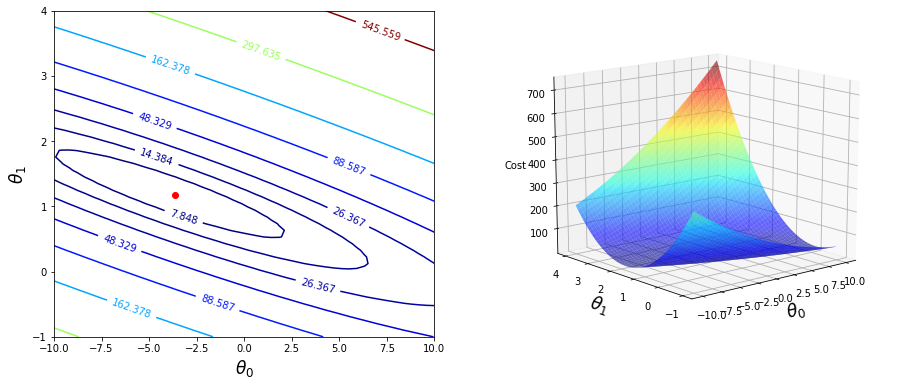

In [18]:
fig=plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.clabel(CS, inline=True, fontsize=10)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In [19]:
xx.size

2500

[[4.24264069 3.16227766 3.16227766 4.24264069]
 [3.         1.         1.         3.        ]
 [4.24264069 3.16227766 3.16227766 4.24264069]]
[-3. -1.  1.  3.]
[-3.  0.  3.]
[[-3. -1.  1.  3.]
 [-3. -1.  1.  3.]
 [-3. -1.  1.  3.]]
[[-3. -3. -3. -3.]
 [ 0.  0.  0.  0.]
 [ 3.  3.  3.  3.]]


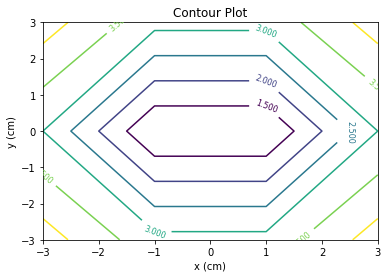

In [20]:
xlist = np.linspace(-3.0, 3.0, 4)
ylist = np.linspace(-3.0, 3.0, 3)
X1, Y1 = np.meshgrid(xlist, ylist)
Z1 = np.sqrt(X1**2 + Y1**2)
print(Z1)
print(xlist)
print(ylist)
print(X1)
print(Y1)
plt.figure()
cp = plt.contour(X1, Y1, Z1)
plt.clabel(cp, inline=True, fontsize=8)
plt.title('Contour Plot')

plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()